In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Mounting google drive to colab

In [2]:
#!unzip /content/drive/MyDrive/facebook-recruiting-iii-keyword-extraction.zip

In [3]:
#!unzip /content/Train.zip

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('/content/drive/MyDrive/sliced_filename.csv')

In [6]:
data.shape

(50000, 4)

In [7]:
#sliced_df = train_data[:50000]

In [8]:
#sliced_df.to_csv('sliced_filename.csv', index=False)

The entire dataset contains more than 6 million datapoints which is difficult to work with in both colab and local environment. So, I took a slice of the data.

In [9]:
data.head(3)

,Id,Title,Body,Tags
0,1,How to check if an uploaded file is an image w...,<p>I'd like to check if an uploaded file is an...,php image-processing file-upload upload mime-t...
1,2,How can I prevent firefox from closing when I ...,"<p>In my favorite editor (vim), I regularly us...",firefox
2,3,R Error Invalid type (list) for variable,<p>I am import matlab file and construct a dat...,r matlab machine-learning


Our dataframe consist of four columns named Id, Title, Body and Tags

In [10]:
data.drop('Id',axis=1,inplace=True)
data.head(3)

,Title,Body,Tags
0,How to check if an uploaded file is an image w...,<p>I'd like to check if an uploaded file is an...,php image-processing file-upload upload mime-t...
1,How can I prevent firefox from closing when I ...,"<p>In my favorite editor (vim), I regularly us...",firefox
2,R Error Invalid type (list) for variable,<p>I am import matlab file and construct a dat...,r matlab machine-learning


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   50000 non-null  object
 1   Body    50000 non-null  object
 2   Tags    50000 non-null  object
dtypes: object(3)
memory usage: 1.1+ MB


In [12]:
data.shape

(50000, 3)

In [13]:
data.isnull().values.any()

False

Checking for null values and no null values are present

In [14]:
data.columns

Index(['Title', 'Body', 'Tags'], dtype='object')

In [15]:
data.duplicated().values.any()

True

In [16]:
data.drop_duplicates(inplace=True)

In [17]:
data.duplicated().values.any()

False

Detected and removed any duplicate values

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49857 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   49857 non-null  object
 1   Body    49857 non-null  object
 2   Tags    49857 non-null  object
dtypes: object(3)
memory usage: 1.5+ MB


In [19]:
sample_title=data["Title"][20]
sample_body=data["Body"][20]

In [20]:
print(f"Sample Title : {sample_title}")
print(f"Sample Body : {sample_body}")

Sample Title : Are cancer recovery rates the same as they were in 1920?
Sample Body : <p><strong>Related:</strong> <a href="http://skeptics.stackexchange.com/questions/3131/have-any-cures-been-invented-since-the-1950s-or-so">Have any “cures” been invented since the 1950's or so?</a></p>

<hr>

<p>I ran across the movie <a href="http://cutpoisonburn.com/">Cut Poison Burn</a>, who's abstract is as follows:</p>

<blockquote>
  <p>Cut Poison Burn is a controversial, eye opening, and sometimes heartbreaking documentary that puts the business of cancer treatment under the microscope. Follow the frustrating journeys of critically ill cancer patients as they try to navigate the confusing and dangerous maze of treatment and encounter formidable obstacles in the “cancer industrial complex.”  A compelling critique of the influence of medical monopolies, the power of pharmaceutical companies and government agencies, Cut Poison Burn is essential viewing for anyone and everyone touched by cancer.</p

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
vectorizer = CountVectorizer(tokenizer = lambda x: x.split())
tag_matrix=vectorizer.fit_transform(data['Tags'])

/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Converted the text data in Tags column to a matrix of token counts by breaking down the text into individual words

In [23]:
tag_matrix.shape

(49857, 13892)

We have 49857 unique datapoints and 13892 unique tags

In [24]:
import sklearn

In [25]:
print(sklearn.__version__)

1.2.1


In [26]:
tags = vectorizer.get_feature_names_out()

In [27]:
print(tags[:10])

['.class-file' '.each' '.emf' '.hgtags' '.htaccess' '.htpasswd' '.mov'
 '.net' '.net-1.1' '.net-2.0']


In [28]:
frequency = tag_matrix.sum(axis=0).A1
tags_frequency=dict(zip(tags,frequency))

Calculated the frequency of each tag in tag matrix and stored them in tags_frequency dictionary

In [29]:
tags_frequency

{'.class-file': 1,
 '.each': 6,
 '.emf': 1,
 '.hgtags': 1,
 '.htaccess': 175,
 '.htpasswd': 1,
 '.mov': 1,
 '.net': 1319,
 '.net-1.1': 1,
 '.net-2.0': 17,
 '.net-3.5': 40,
 '.net-4.0': 62,
 '.net-4.5': 8,
 '.net-assembly': 12,
 '.net-cf-3.5': 1,
 '.net-framework': 2,
 '.net-remoting': 1,
 '.net2.0': 1,
 '.net4.0': 2,
 '.nettiers': 1,
 '.obj': 1,
 '.post': 2,
 '.refresh': 1,
 '.war': 1,
 '.x': 2,
 '1080p': 2,
 '10gbethernet': 1,
 '10gige': 1,
 '1and1': 2,
 '2003': 1,
 '2007': 43,
 '2010': 63,
 '2013': 8,
 '24bit': 1,
 '2d': 19,
 '2d-array': 7,
 '2d-games': 1,
 '2wire': 1,
 '3-tier': 1,
 '3.0': 9,
 '3.0.1': 1,
 '301-redirect': 1,
 '32-bit': 6,
 '32bit': 2,
 '32bit-64bit': 9,
 '3d': 46,
 '3d-engine': 1,
 '3d-model': 2,
 '3d-modelling': 1,
 '3des': 2,
 '3dsmax': 3,
 '3g': 8,
 '3rd-party-library': 1,
 '401': 1,
 '403': 1,
 '404': 1,
 '404-error': 5,
 '4d': 1,
 '5.1': 1,
 '500-error': 1,
 '64-bit': 36,
 '64bit': 17,
 '6502': 1,
 '6510': 1,
 '68000': 1,
 '7-zip': 5,
 '70-667': 1,
 '7zip': 5,


In [30]:
tag_df = pd.Series(tags_frequency)

Created a pandas series from tags_frequency dictionary

In [31]:
tag_df

.class-file          1
.each                6
.emf                 1
.hgtags              1
.htaccess          175
                  ... 
zune                 1
zune-hd              1
zurb-foundation      1
zwoptex              1
zxing                4
Length: 13892, dtype: int64

In [32]:
tag_df = tag_df.to_frame(name='counts')
tag_df.head(3)

,counts
.class-file,1
.each,6
.emf,1


Converted the pandas series to pandas dataframe

In [33]:
sorted_df = tag_df.sort_values(['counts'],ascending=False)

Sorted the dataframe by the counts column in descending order

In [34]:
tag_counts = sorted_df['counts'].values

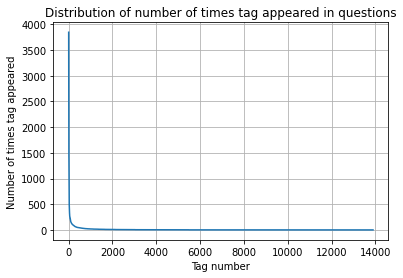

In [35]:
plt.plot(tag_counts)
plt.title("Distribution of number of times tag appeared in questions")
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()

The visualization is not very great when taking all tags. so, lets take first 100 tags and see their distribution.

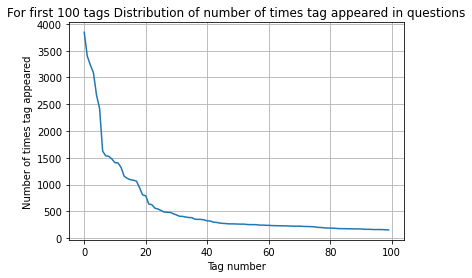

In [36]:
plt.plot(tag_counts[0:100])
plt.title('For first 100 tags Distribution of number of times tag appeared in questions')
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()

In [37]:
tag_question_count = tag_matrix.sum(axis=1).tolist()
tag_question_count=[int(j) for i in tag_question_count for j in i]

In [38]:
max_tags = max(tag_question_count)
min_tags = min(tag_question_count)
avg_tags = sum(tag_question_count)/len(tag_question_count)
print('The maximum number of tags in a question is',max_tags)
print('The minimum number of tags in a question is',min_tags)
print('The average number of tags in a question is',avg_tags)

The maximum number of tags in a question is 5
The minimum number of tags in a question is 1
The average number of tags in a question is 2.885652967487013


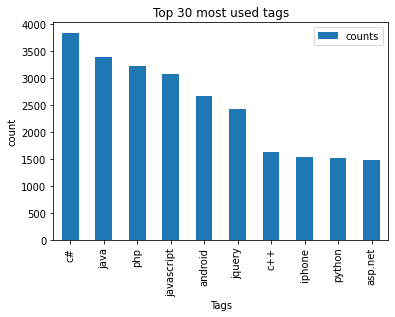

In [39]:
sorted_df.head(10).plot(kind='bar')
plt.title('Top 30 most used tags')
plt.xlabel('Tags')
plt.ylabel('count')
plt.show()

So, c# is the most frequently occuring tag among all.

In [40]:
import re
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer

In [41]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [42]:
data.head(3)

,Title,Body,Tags
0,How to check if an uploaded file is an image w...,<p>I'd like to check if an uploaded file is an...,php image-processing file-upload upload mime-t...
1,How can I prevent firefox from closing when I ...,"<p>In my favorite editor (vim), I regularly us...",firefox
2,R Error Invalid type (list) for variable,<p>I am import matlab file and construct a dat...,r matlab machine-learning


As we can see, our text data contains html tags,apostrophees,stopwords which provide no semantic meaning for the algorithm. So, i remove them and cleaned up the text.

In [43]:
from bs4 import BeautifulSoup

In [44]:
def remove_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

BeautifulSoup is a library that can be used to remove html tags eficiently. Here, i imported the library and defined a function that can remove the html tags.

In [45]:
data['Body'] = data['Body'].apply(remove_html_tags)
data['Title'] = data['Title'].apply(remove_html_tags)

Applied the html tags remover function to our data.

In [46]:
data['Title'] = data['Title'].str.replace("'", '')
data['Body'] = data['Body'].str.replace("'", '')

Replaced all apostrophees with an empty string

In [47]:
data.head(3)

,Title,Body,Tags
0,How to check if an uploaded file is an image w...,Id like to check if an uploaded file is an ima...,php image-processing file-upload upload mime-t...
1,How can I prevent firefox from closing when I ...,"In my favorite editor (vim), I regularly use c...",firefox
2,R Error Invalid type (list) for variable,I am import matlab file and construct a data f...,r matlab machine-learning


In [48]:
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

Stopwords can add noise to the data and also increase the text complexity. So, it is better to remove them. Here, i Defined a function that can remove stopwords

In [49]:
data['Title'] = data['Title'].apply(remove_stopwords)

In [50]:
data['Body'] = data['Body'].apply(remove_stopwords)

Applied the stopwords removal function to our data.

In [51]:
data.head(3)

,Title,Body,Tags
0,check uploaded file image without mime type?,Id like check uploaded file image file (e.g pn...,php image-processing file-upload upload mime-t...
1,prevent firefox closing press ctrl-w,"favorite editor (vim), regularly use ctrl-w ex...",firefox
2,R Error Invalid type (list) variable,"import matlab file construct data frame, matla...",r matlab machine-learning


In [52]:
data['text'] = data['Title'].str.cat(data['Body'], sep=' ')

Concatenated the Title and Body column into a single column to make this less complex.

In [53]:
data.head(3)

,Title,Body,Tags,text
0,check uploaded file image without mime type?,Id like check uploaded file image file (e.g pn...,php image-processing file-upload upload mime-t...,check uploaded file image without mime type? I...
1,prevent firefox closing press ctrl-w,"favorite editor (vim), regularly use ctrl-w ex...",firefox,prevent firefox closing press ctrl-w favorite ...
2,R Error Invalid type (list) variable,"import matlab file construct data frame, matla...",r matlab machine-learning,R Error Invalid type (list) variable import ma...


In [54]:
data["text"][0]

'check uploaded file image without mime type? Id like check uploaded file image file (e.g png, jpg, jpeg, gif, bmp) another file. problem Im using Uploadify upload files, changes mime type gives text/octal something mime type, matter file type upload. way check uploaded file image apart checking file extension using PHP?'

In [55]:
data= data.drop('Body',axis=1)
data= data.drop('Title',axis=1)

In [56]:
data.head(3)

,Tags,text
0,php image-processing file-upload upload mime-t...,check uploaded file image without mime type? I...
1,firefox,prevent firefox closing press ctrl-w favorite ...
2,r matlab machine-learning,R Error Invalid type (list) variable import ma...


In [57]:
stemmer = SnowballStemmer("english")

Stemming is a process of minimizing a word to its root form. It helps in reducing the total number of words in the corpus.

In [58]:
data['text'] = data['text'].str.split()

Splitting the data in text column into individual words based on whitespace as part of stemming.

In [59]:
data['stemmed_text'] = data['text'].apply(lambda x: [stemmer.stem(y) for y in x])

Applied the stemming function to our data.

In [60]:
data.head(3)

,Tags,text,stemmed_text
0,php image-processing file-upload upload mime-t...,"[check, uploaded, file, image, without, mime, ...","[check, upload, file, imag, without, mime, typ..."
1,firefox,"[prevent, firefox, closing, press, ctrl-w, fav...","[prevent, firefox, close, press, ctrl-w, favor..."
2,r matlab machine-learning,"[R, Error, Invalid, type, (list), variable, im...","[r, error, invalid, type, (list), variabl, imp..."


In [61]:
data.drop('text',axis=1,inplace=True)

In [62]:
data.head(3)

,Tags,stemmed_text
0,php image-processing file-upload upload mime-t...,"[check, upload, file, imag, without, mime, typ..."
1,firefox,"[prevent, firefox, close, press, ctrl-w, favor..."
2,r matlab machine-learning,"[r, error, invalid, type, (list), variabl, imp..."


Instead of taking all tags, i will take a sample of it due to limited computing capacity

In [63]:
def tags_to_choose(n):
    t = tag_matrix.sum(axis=0).tolist()[0]
    sorted_tags_i = sorted(range(len(t)), key=lambda i: t[i], reverse=True)
    multilabel_yn=tag_matrix[:,sorted_tags_i[:n]]
    return multilabel_yn

In [64]:
def questions_explained_fn(n):
    multilabel_yn = tags_to_choose(n)
    x= multilabel_yn.sum(axis=1)
    return (np.count_nonzero(x==0))

In [65]:
questions_explained = []
total_tags=tag_matrix.shape[1]
total_qs=data.shape[0]
for i in range(500, total_tags, 100):
    questions_explained.append(np.round(((total_qs-questions_explained_fn(i))/total_qs)*100,3))

<ipython-input-66-b1a5c81f623e>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabel)


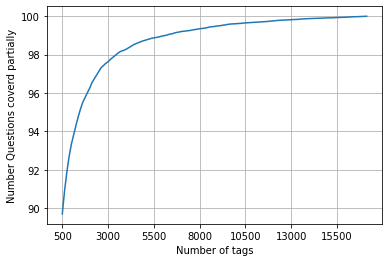

With around 8000 tags we can cover 99% % of questions


In [66]:
fig, ax = plt.subplots()
ax.plot(questions_explained)
xlabel = list(500+np.array(range(-50,450,50))*50)
ax.set_xticklabels(xlabel)
plt.xlabel("Number of tags")
plt.ylabel("Number Questions coverd partially")
plt.grid()
plt.show()
print("With around",8000,"tags we can cover 99% % of questions")

In [67]:
multilabel_yx = tags_to_choose(8000)

In [68]:
total_size = data.shape[0]
train_size = int(0.80 * total_size)
x_train = data.head(train_size)
x_test = data.tail(total_size - train_size)
y_train = multilabel_yx[0:train_size,:]
y_test = multilabel_yx[train_size:total_size,:]

Splitted our data into train and test set.

In [69]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(39885, 2)
(9972, 2)
(39885, 8000)
(9972, 8000)


In [70]:
!pip install scikit-multilearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 KB 3.8 MB/s eta 0:00:00


In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer

Any algorithm can only process numerical values. Tfidf is a method of converting text documents to numerical feature matrix.

In [72]:
data['stemmed_text'] = data['stemmed_text'].astype(str)

In [73]:
vectorizer = TfidfVectorizer(min_df=0.00009, max_features=100000, smooth_idf=True, norm="l2", \
                             tokenizer = lambda x: x.split(), sublinear_tf=False, ngram_range=(1,3))
x_train_multilabel = vectorizer.fit_transform(x_train['stemmed_text'])
x_test_multilabel = vectorizer.transform(x_test['stemmed_text'])

/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [74]:
print("Dimensions of train data X:",x_train_multilabel.shape, "Y :",y_train.shape)
print("Dimensions of test data X:",x_test_multilabel.shape,"Y:",y_test.shape)

Dimensions of train data X: (39885, 100000) Y : (39885, 8000)
Dimensions of test data X: (9972, 100000) Y: (9972, 8000)


In [75]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score

In [77]:
classifier = OneVsRestClassifier(LogisticRegression(penalty='l2'), n_jobs=-1)
classifier.fit(x_train_multilabel, y_train)
predictions= classifier.predict(x_test_multilabel)

accuracy = accuracy_score(y_test, predictions)
macro_f1 = f1_score(y_test, predictions, average='macro', zero_division=1)
micro_f1 = f1_score(y_test, predictions, average='micro', zero_division=1)

In [78]:
print("Accuracy:", accuracy)
print("Macro F1 score:", macro_f1)
print("Micro F1 score:", micro_f1)

Accuracy: 0.03118732450862415
Macro F1 score: 0.3776499990680424
Micro F1 score: 0.15807178549266795
